In [9]:
%pylab inline
import sklearn
import pandas as pd
import mylib.utils as mu
from sklearn.metrics import f1_score

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
data = mu.load_data(['raw_scores'])

In [11]:
target = mu.load_target_data()

In [15]:
results = mu.train_regression(data, ravel(target), scorer=f1_score)

17:34:30 10/02/15 BRT - Spliting into test and validation
17:34:30 10/02/15 BRT - Starting to train models
17:34:31 10/02/15 BRT - Took 0.278532981873 seconds


In [16]:
mu.print_best(results)

------------------------------------------------- 
0 Model - Score: val - 0.478261 :: train - 0.995708
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
------------------------------------------------- 
------------------------------------------------- 
1 Model - Score: val - 0.437500 :: train - 0.534031
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
------------------------------------------------- 
------------------------------------------------- 
2 Model - Score: val - 0.425926 :: train - 0.882096
GradientBoostingClassifier(init=None, learning_rate=0.1, los

In [18]:
results[0][1]

{'model': ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 'pred_train': array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1

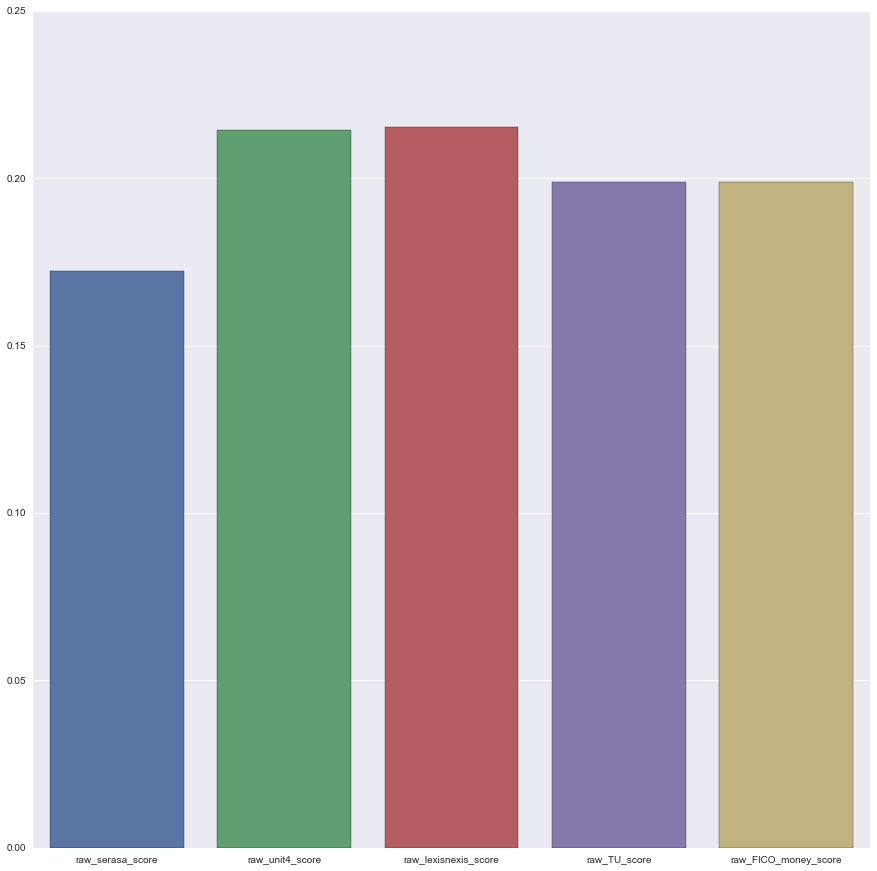

In [14]:
import seaborn as sns
model = results[0][1]['model']
# print model info
f, ax = plt.subplots(figsize=(15, 15))
index_most_important = model.feature_importances_>0.02
ax = sns.barplot(x=data.columns[index_most_important], y=model.feature_importances_[index_most_important])